# Below shows some steps for loading the data 

In [ ]:
!git clone https://github.com/ieee8023/covid-chestxray-dataset

Cloning into 'covid-chestxray-dataset'...
remote: Enumerating objects: 3641, done.


In [ ]:
# You can use the tf loader or use the metafile csv

In [ ]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Activation, Dropout,Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Lambda, Input, AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model, Sequential
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import shutil
import cv2
import os

In [ ]:
dataset_path = './covid-chestxray-dataset'

In [ ]:
# using pytorch loader 
!pip -q install torchxrayvision
import torchxrayvision as xrv
!git clone https://github.com/ieee8023/covid-chestxray-dataset
d = xrv.datasets.COVID19_Dataset(imgpath="covid-chestxray-dataset/images/",csvpath="covid-chestxray-dataset/metadata.csv")
features = 'img' # 
target = 'lab'  #

In [ ]:
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import torch  
import torchvision
import torchxrayvision as xrv
import pylab
import torch.optim as optim
import torch.nn as nn
from pathlib import Path
from tqdm import tqdm


PATH = Path('covid-chestxray-dataset')
transform = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),xrv.datasets.XRayResizer(224)])
dataset = xrv.datasets.COVID19_Dataset(imgpath=PATH/'images',csvpath=PATH/'metadata.csv', transform=transform)

len_dataset=len(dataset)
n_train=int(0.9*len_dataset)
n_test=int(0.1*len_dataset)+1
print(f'Total samples: {len_dataset}, train size size: {n_train}, test set size: {n_test}')

train_ds, test_ds = torch.utils.data.random_split(dataset, [n_train,n_test])
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=4,shuffle=True, num_workers=4)
test_dl = torch.utils.data.DataLoader(test_ds, batch_size=4,shuffle=True, num_workers=1)
model = xrv.models.DenseNet(num_classes=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
train_loss_history, test_loss_history = [], []
for epoch in tqdm(range(10)):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_dl, 0):

        inputs=data[features]
        labels=data[target].long()
        labels=labels[:,2]

        # get the inputs; data is a list of [inputs, labels]
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    test_loss=0.0

    for i, data in enumerate(test_dl, 0):
        inputs=data[features]
        labels=data[target].long()
        labels=labels[:,2]

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # print statistics
        test_loss += loss.item()
        
    train_loss_history.append(running_loss)
    test_loss_history.append(test_loss)

## Plot x-rays

Helper function to plot the images in a grid

In [ ]:
def ceildiv(a, b):
    return -(-a // b)

def plots_from_files(imspaths, figsize=(10,5), rows=1, titles=None, maintitle=None):
    """Plot the images in a grid"""
    f = plt.figure(figsize=figsize)
    if maintitle is not None: plt.suptitle(maintitle, fontsize=10)
    for i in range(len(imspaths)):
        sp = f.add_subplot(rows, ceildiv(len(imspaths), rows), i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        img = plt.imread(imspaths[i])
        plt.imshow(img)

In [ ]:
normal_images = list(paths.list_images(f"{dataset_path}/normal"))
covid_images = list(paths.list_images(f"{dataset_path}/covid"))

In [ ]:
#plots_from_files(normal_images, rows=5, maintitle="Normal X-ray images")

NameError: ignored

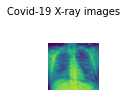

In [ ]:
#plots_from_files(['covid-chestxray-dataset/images/f46a9bfc7222e61e099a25ab9267da_jumbo.jpeg'], rows=5, maintitle="Covid-19 X-ray images")

## Data preprocessing

In [ ]:
import os
csvPath = os.path.sep.join(["/content/drive/My Drive/", "processed_images/data_processing/combined_cxr_metadata.csv"])
df = pd.read_csv(csvPath)
images = []
labels = []
# loop over the rows of the COVID-19 data frame
for (i, row) in df.iterrows():
    label = round(row['OpacityScoreGlobal'])
    imagePath = os.path.sep.join(['/content/drive/My Drive/processed_images',  row["filename"]])
    if not os.path.exists(imagePath):
        continue
    else: 
         #image = cv2.imread(path)
         image = cv2.imread(imagePath)
         #images.append(row['filename'])
         labels.append(label)
         images.append(image)
    

images = np.array(images) / 255.0
np.savetxt('/content/drive/My Drive/processed_images/data_processing/data.csv', data, delimiter=',')
np.savetxt("/content/drive/My Drive/processed_images/data_processing/labels.csv")

KeyboardInterrupt: ignored

In [ ]:
np.savetxt('/content/drive/My Drive/processed_images/data_processing/data.csv', images, delimiter=',')
np.savetxt("/content/drive/My Drive/processed_images/data_processing/labels.csv")

In [ ]:
len(labels)

3000

In [ ]:
#labels[0:100]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#normal_dataset_path="/content/drive/My Drive/data-samples/normal"

In [ ]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 30
BS = 8

In [ ]:
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")
imagePaths = list(paths.list_images('/content/drive/My Drive/processed_images'))
data = []
#labels = []
# loop over the image paths

for i in range(0, len(all_images)): 
  #print(i)
  path = '/content/drive/My Drive/processed_images' + "" + "/{}".format(all_images[i])
  if not os.path.exists(path):
    path = all_images[i]
  image = cv2.imread(path)
  image = cv2.imread(imagePath)
  #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  #image = cv2.resize(image, (224, 224))
  data.append(image)

data = np.array(data) / 255.0

[INFO] loading images...


In [ ]:
#data = np.array(images)/255.0

In [ ]:
labels = np.array(labels)
#np_array_labels.shape

In [ ]:
#print(np_array_labels )

[1 3 3 4 2 2 4 5 2 1 0 1 1 2 1 3 4 4 2 3 4 2 2 2 4 0 0 2 5 6 3 2 3 2 3 4 3
 4 4 2 4 2 2 2 4 4 3 2 0 0 3 2 1 0 0 1 2 4 1 2 3 3 2 1 2 4 0 6 4 3 5 2 0 1
 1 3 3 3 5 4 6 2 4 1 1 0 1 1 3 3 4 1 3 0 2 3 2 3 2 2 2 3 2 2 2 3 2 4 4 3 2
 2 1 2 3 1 2 0 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 2 2 3 4 3 3 3 2 2 2 3
 1 2 3 3 3 3 3 4 4 4 4 4 3 4 4 4 4 4 1 0 0 2 3 2 2 2 2 2 0 3 1 1 1 1 2 2 2
 2 4 2 2 2 2 1 2 2 1 2 3 3 3 3 3 3 4 4 3 3 4 1 1 2 1 2 2 0 2 1 3 2 2 4 0 2
 2 1 2 2 4 4 4 4 4 4 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 4 2 1 1 2 2
 2 2 2 2 3 3 3 2 1 3 2 3 0 1 2 2 4 4 2 3 3 2 2 3 2 1 3 4 4 4 4 4 2 2 2 2 2
 2 3 2 3 3 2 1 1 2 2 3 3 2 3 3 2 2 2 3 2 4 3 2 2 2 2 3 3 4 2 2 2 1 2 2 2 2
 2 2 2 2 3 2 3 1 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2
 2 3 2 4 3 4 5 5 3 3 2 2 2 2 2 2 2 3 3 2 4 0 1 0 0 2 2 2 2 2 2 2 3 3 3 1 3
 2 2 4 3 3 2 2 2 2 2 2 2 2 2 3 4 4 4 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 3 4 0 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 6 4 3 4 4 4 4 4 4 3 4 3 4 4 4 4 2 3
 2 2 3 4 4 6 2 3 3 2 2 2 

## Model

In [ ]:
# perform one-hot encoding on the labels
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
#np_array_labels = mlb.fit_transform(np_array_labels)
#np_array_labels = mlb.fit_transform(np_array_labels)
lb = LabelBinarizer()
np_array_labels = lb.fit_transform(labels)
#np_array_labels = to_categorical(np_array_labels)
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
#(trainX, testX, trainY, testY) = train_test_split(data, np_array_labels, test_size=0.20, random_state=42, shuffle=True)
# initialize the training data augmentation object
#trainAug = ImageDataGenerator(rotation_range=15, fill_mode="nearest")

In [ ]:
np_array_labels[1]

IndexError: ignored

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(images, np_array_labels, test_size=0.20, random_state=42, shuffle=True)

In [ ]:
trainAug = ImageDataGenerator(rotation_range=15, fill_mode="nearest")

In [ ]:
trainAug = ImageDataGenerator(rotation_range=15, fill_mode="nearest")
# load the VGG16 network, ensuring the head FC layer sets are left
# off
baseModel = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.6)(headModel)
headModel = Dense(7, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
    layer.trainable = False

print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
    trainAug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    #validation_data=(testX, testY),
    #validation_steps=len(testX) // BS,
    epochs=EPOCHS)


### Training

In [ ]:
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
    trainAug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    #validation_data=(testX, testY),
    #validation_steps=len(testX) // BS,
    epochs=EPOCHS)


[INFO] compiling model...
[INFO] training head...


<ipython-input-12-58d6629ef9cc>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(


Epoch 1/30
300/300 [==============================] - 43s 93ms/step - loss: 1.6350 - accuracy: 0.2883
Epoch 2/30
300/300 [==============================] - 28s 94ms/step - loss: 1.5443 - accuracy: 0.3254
Epoch 3/30
300/300 [==============================] - 28s 93ms/step - loss: 1.4826 - accuracy: 0.3512
Epoch 4/30
300/300 [==============================] - 28s 92ms/step - loss: 1.4761 - accuracy: 0.3537
Epoch 5/30
300/300 [==============================] - 28s 92ms/step - loss: 1.4557 - accuracy: 0.3579
Epoch 6/30
300/300 [==============================] - 28s 94ms/step - loss: 1.4294 - accuracy: 0.3750
Epoch 7/30
300/300 [==============================] - 28s 92ms/step - loss: 1.4271 - accuracy: 0.3929
Epoch 8/30
300/300 [==============================] - 28s 93ms/step - loss: 1.4069 - accuracy: 0.3750
Epoch 9/30
300/300 [==============================] - 28s 93ms/step - loss: 1.4011 - accuracy: 0.3842
Epoch 10/30
300/300 [==============================] - 28s 93ms/step - loss: 1.387

### Plot trining metrics

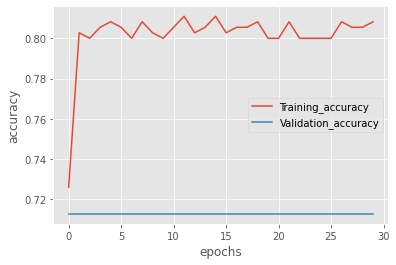

In [ ]:
accs = H.history['accuracy']
val_accs = H.history['val_accuracy']

plt.plot(range(len(accs)),accs, label = 'Training_accuracy')
plt.plot(range(len(accs)),val_accs, label = 'Validation_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

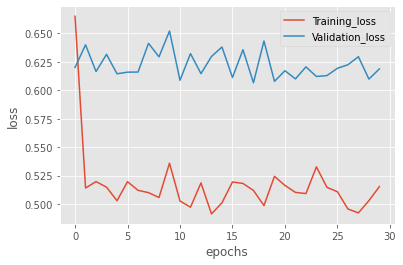

In [ ]:
loss = H.history['loss']
val_loss = H.history['val_loss']

plt.plot(range(len(accs)),loss, label = 'Training_loss')
plt.plot(range(len(accs)),val_loss, label = 'Validation_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

**Accuracy and Loss curve in single graph**

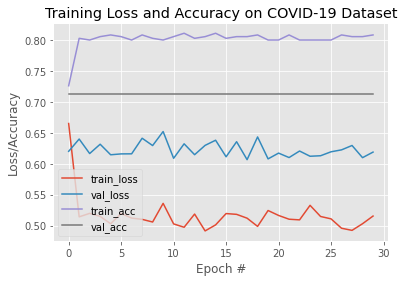

In [ ]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

### Evaluation

In [ ]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(predIdxs)
print(testY.argmax(axis=1))
#print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))

[INFO] evaluating network...
10/10 [==============================] - 0s 9ms/step
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]
[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]


#### Confusion matrix

In [ ]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[ 0  6]
 [ 0 73]]
acc: 0.9241
sensitivity: 0.0000
specificity: 1.0000


## Credits
This notebook is based on this tutorial - [link](https://www.pyimagesearch.com/2020/03/16/detecting-covid-19-in-x-ray-images-with-keras-tensorflow-and-deep-learning/)

In [ ]:
import re
import os
import numpy as np
import pandas as pd
import tensorflow as tf
#from kaggle_datasets import KaggleDatasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ]
    )
    
    return block

In [ ]:
def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block

In [ ]:


def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(224, 224, 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(2, activation='softmax')
    ])
    
    return model

In [ ]:
#with strategy.scope():
model = build_model()

METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

In [ ]:
history = model.fit(
    x=trainX, y=trainY,
    steps_per_epoch=100,
    epochs=EPOCHS,
    validation_data=(testX, testY),
    validation_steps=10
    #class_weight=class_weight,
)

Epoch 1/30
100/100 [==============================] - 6s 34ms/step - loss: 0.8926 - accuracy: 0.5300 - precision: 0.5300 - recall: 0.5300 - val_loss: 0.6879 - val_accuracy: 0.6944 - val_precision: 0.6944 - val_recall: 0.6944
Epoch 2/30
100/100 [==============================] - 3s 27ms/step - loss: 0.8271 - accuracy: 0.5420 - precision: 0.5420 - recall: 0.5420 - val_loss: 0.6333 - val_accuracy: 0.6944 - val_precision: 0.6944 - val_recall: 0.6944
Epoch 3/30
100/100 [==============================] - 3s 26ms/step - loss: 0.7594 - accuracy: 0.5960 - precision: 0.5960 - recall: 0.5960 - val_loss: 0.6269 - val_accuracy: 0.6944 - val_precision: 0.6944 - val_recall: 0.6944
Epoch 4/30
100/100 [==============================] - 3s 27ms/step - loss: 0.7163 - accuracy: 0.6100 - precision: 0.6100 - recall: 0.6100 - val_loss: 0.6611 - val_accuracy: 0.6944 - val_precision: 0.6944 - val_recall: 0.6944
Epoch 5/30
100/100 [==============================] - 3s 26ms/step - loss: 0.7384 - accuracy: 0.6220

100/100 [==============================] - 2s 22ms/step - loss: 0.6382 - accuracy: 0.6800 - precision: 0.6800 - recall: 0.6800 - val_loss: 0.6316 - val_accuracy: 0.6944 - val_precision: 0.6944 - val_recall: 0.6944


In [ ]:
H = model.fit_generator(
    trainAug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS)

Epoch 1/30


<ipython-input-158-853bb0e42dbe>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(


53/53 [==============================] - ETA: 0s - loss: 0.6370 - accuracy: 0.6754 - precision: 0.6754 - recall: 0.6754

53/53 [==============================] - 5s 80ms/step - loss: 0.6370 - accuracy: 0.6754 - precision: 0.6754 - recall: 0.6754 - val_loss: 0.6399 - val_accuracy: 0.6944 - val_precision: 0.6944 - val_recall: 0.6944
Epoch 2/30
53/53 [==============================] - 4s 74ms/step - loss: 0.6478 - accuracy: 0.6801 - precision: 0.6801 - recall: 0.6801
Epoch 3/30
53/53 [==============================] - 4s 75ms/step - loss: 0.6454 - accuracy: 0.6730 - precision: 0.6730 - recall: 0.6730
Epoch 4/30
53/53 [==============================] - 4s 75ms/step - loss: 0.6393 - accuracy: 0.6777 - precision: 0.6777 - recall: 0.6777
Epoch 5/30
53/53 [==============================] - 4s 75ms/step - loss: 0.6433 - accuracy: 0.6801 - precision: 0.6801 - recall: 0.6801
Epoch 6/30
53/53 [==============================] - 4s 75ms/step - loss: 0.6357 - accuracy: 0.6801 - precision: 0.6801 - recall: 0.6801
Epoch 7/30
53/53 [==============================] - 4s 74ms/step - loss: 0.6365 - accuracy: 0.6754 - precisi